# Hypothesis Testing

In [1]:
#Importing the required libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm 

# Q.1. Hypothesis Testing Exercise:

Null Hypothesis : Mean value of both samples are similar and there is no significant difference between samples.

Alternate Hypothesis : Mean value of both samples are different and there is difference between samples.

Given probability : 5%

Alpha = 0.05/2,    (as we are conducting a two tailed test ) 
      = 0.025 

### Importing dataset:

In [2]:
cutlets = pd.read_csv("C:/Users/DELL/Desktop/ExcelR DS Assignments/Assignment 3/Cutlets.csv")
cutlets.head(10)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


### Applying Descriptive Statistics:

In [3]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


### Checking for Null Values:

In [4]:
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

### Checking for Duplicate Values:

In [5]:
cutlets[cutlets.duplicated()].shape

(0, 2)

In [6]:
cutlets[cutlets.duplicated()]

,Unit A,Unit B


### Checking the datatype:

In [7]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


### Plotting Q-Q plot to check the normality of the distribution:

Text(0.5, 1.0, 'Unit B')

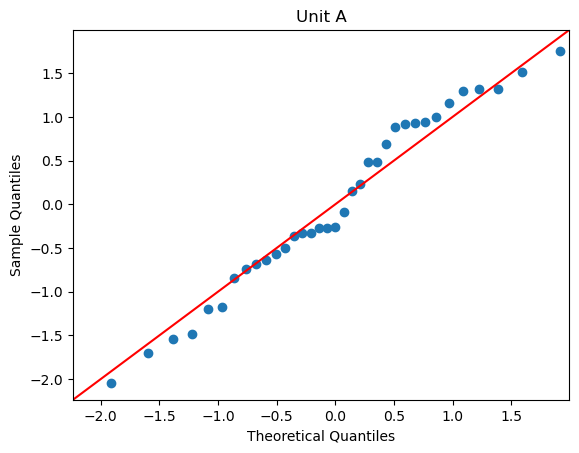

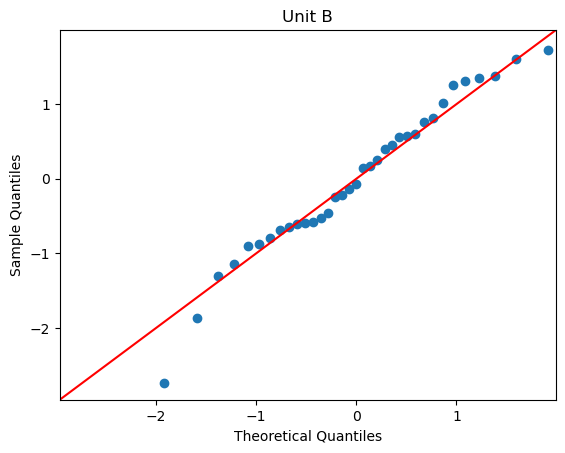

In [8]:
sm.qqplot(cutlets['Unit A'], fit = True, line='45')
plt.title('Unit A')

sm.qqplot(cutlets['Unit B'], fit = True, line='45')
plt.title('Unit B')

### Compare evidences with Hypothesis using t-statistics:

In [9]:
stats.ttest_ind(cutlets['Unit A'], cutlets['Unit B'])                   

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

After performimg two tailed t-test on the given data, 

we can see that:

P-Value = 0.47 > 0.05 (significance level).

#### Hence, we fail to reject the Null Hypothesis. 

#### Because of lack of evidence, there is no significant difference between the two samples.

# Q.2. Hypothesis Testing Exercise 2:

Null Hypothesis : There is no difference in the average (Turn Around Time) TAT of reports of labs.


Alternate Hypothesis : Atleast one of the them is different.

### Importing Dataset:

In [10]:
df = pd.read_csv("C:/Users/DELL/Desktop/ExcelR DS Assignments/Assignment 3/LabTAT.csv")
df.head(10)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
5,179.45,197.00,181.51,161.12
6,191.37,166.36,214.21,154.02
7,166.81,169.60,183.43,163.25
8,158.81,175.36,191.60,152.79
9,165.88,198.68,208.43,161.98


### Applying Descriptive Statistics:

In [11]:
df.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


### Checking for null values:

In [12]:
df.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

### Checking for Duplicate values:

In [13]:
df[df.duplicated()].shape

(0, 4)

In [14]:
df[df.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


### Checking the data type:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


### Plotting Q-Q plot to check the normality of the distribution:

In [16]:
lab1 = pd.Series(df['Laboratory 1'].values)
lab2 = pd.Series(df['Laboratory 2'].values)
lab3 = pd.Series(df['Laboratory 3'].values)
lab4 = pd.Series(df['Laboratory 4'].values)

Text(0.5, 1.0, 'Laboratory 4')

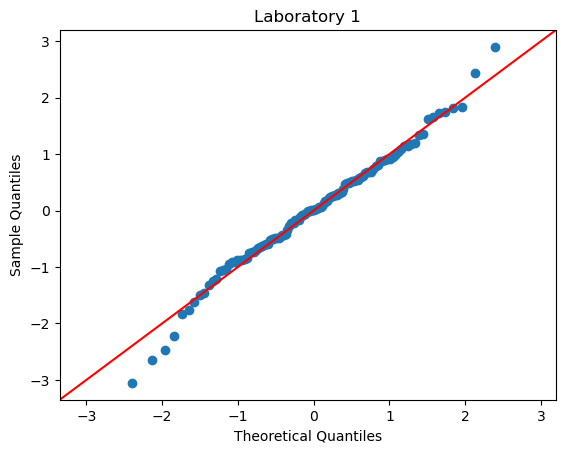

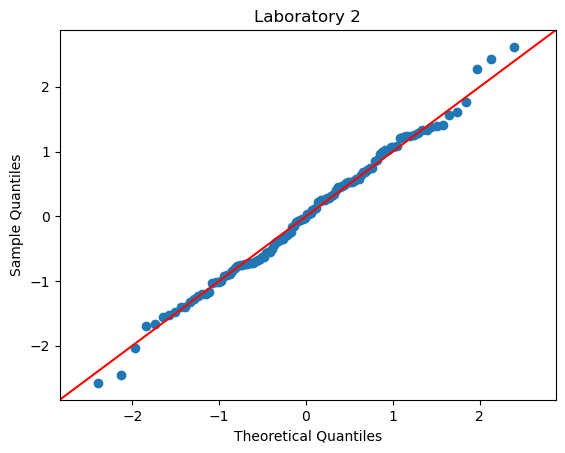

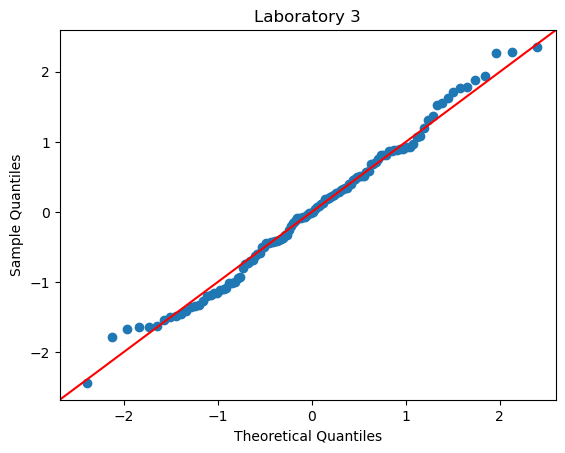

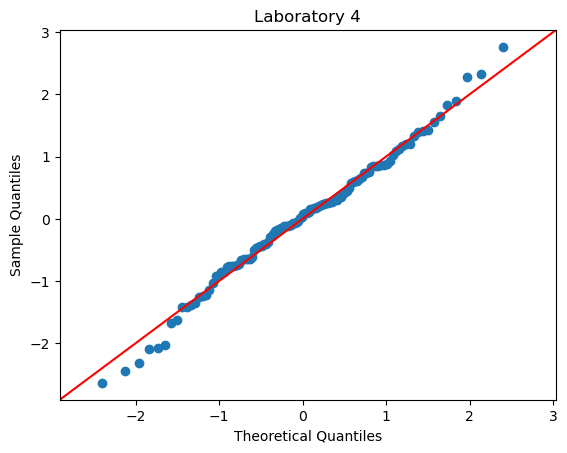

In [17]:
sm.qqplot(lab1, fit=True, line='45')
plt.title('Laboratory 1')

sm.qqplot(lab2, fit=True, line='45')
plt.title('Laboratory 2')

sm.qqplot(lab3, fit=True, line='45')
plt.title('Laboratory 3')

sm.qqplot(lab4, fit=True, line='45')
plt.title('Laboratory 4')

### Perforning the ANOVA statistics test:

In [18]:
anova = stats.f_oneway(lab1, lab2, lab3, lab4)
print(anova)

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)


After performimg ANOVA test on the given data, 

we can see that:

P-Value  < 0.05 (significance level).

#### Hence, we accept the Alternate Hypothesis. 

#### We reject Null Hypothesis, there is a significance difference between TAT of reports of the laboratories.

# Q.3. Hypothesis Testing Exercise:

Null Hypothesis: All proportions are equal.

Alternative Hypthosis: Not all Proportions are equal.

### Importing Dataset:

In [19]:
buyer = pd.read_csv("C:/Users/DELL/Desktop/ExcelR DS Assignments/Assignment 3/BuyerRatio.csv")
buyer                

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


Decide a cut-off value

Significance = 5%

Alpha = 0.05

As it is a one-tailed test,

Alpha = 1-0.95 = 0.05

### Method 1: Using a DataFrame to create a table of required numerical data:

In [20]:
df = pd.DataFrame([[50,435],[142,1523],[131,1356],[70,750]], index=['East','West','North','South'], columns=['Males','Females'])
df

,Males,Females
East,50,435
West,142,1523
North,131,1356
South,70,750


### Method 2: Using np.array to create a table using array:

In [21]:
table = np.array([[50,142,131,70],
                 [435,1523,1356,750]])
print(table)

[[  50  142  131   70]
 [ 435 1523 1356  750]]


### Performing the Chi-Square Test on the data:

In [22]:
#For the DataFrame df:

stats.chi2_contingency(df)

(1.5959455386610577,
 0.6603094907091882,
 3,
 array([[  42.76531299,  442.23468701],
        [ 146.81287862, 1518.18712138],
        [ 131.11756787, 1355.88243213],
        [  72.30424052,  747.69575948]]))

In [23]:
#For the table:

stats.chi2_contingency(table) 

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

Here, 

Chi-Square Statistics = 1.595945538661058

P-Value = 0.6603094907091882

Degrees of Freedom = 3
      
#### Since, P-value = 0.66 is greater than 0.05 (Alpha), we fail to reject Null Hypothesis.

We can say that not all the gender based buyer ratios are in equal proportion.

## Q.4. Hypothesis Testing Exercise:

Null Hypotheis : Defective percentage for all the 4 centres is similar.
    
Alternate Hypothesis : Defective percentage for atleast one of them is different.

### Importing Dataset:

In [24]:
df = pd.read_csv("C:/Users/DELL/Desktop/ExcelR DS Assignments/Assignment 3/CustomerOrderForm.csv")
df

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


### Checking the data type:

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


### Applying Descriptive Statistics:

In [26]:
df.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


### Checking for null values:

In [27]:
df.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

### Checking value counts for each column:

In [28]:
for i in df.columns:
    print(df[i].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64
Error Free    267
Defective      33
Name: Indonesia, dtype: int64
Error Free    269
Defective      31
Name: Malta, dtype: int64
Error Free    280
Defective      20
Name: India, dtype: int64


### Creating Contingency Table:

In [29]:
table = np.array([[271,267,269,280],
                [29,33,31,20]])
print('Table=\n',table)

Table=
 [[271 267 269 280]
 [ 29  33  31  20]]


### Performing the Chi-Square Test on the data:

In [30]:
stats.chi2_contingency(table)

(3.858960685820355,
 0.2771020991233135,
 3,
 array([[271.75, 271.75, 271.75, 271.75],
        [ 28.25,  28.25,  28.25,  28.25]]))

Here, 

Chi-Square Statistics = 3.8589606858203545

P-Value = 0.2771020991233144

Degrees of Freedom = 3
      
#### Since, P-value = 0.277 is greater than 0.05 (Alpha), we fail to reject Null Hypothesis.

We can say that defective percentage for all the 4 centres is similar.